IN this project I have build image classification model using TensorFlow 2.0 with a convolutional neural network on the CIFAR-10 dataset.


# Dataset
CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.
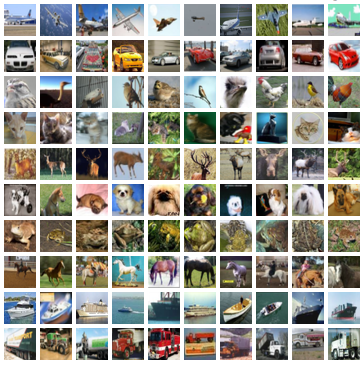
*   CIFAR-10 : 32*32 color images
*   Labels: It contains classes such as automobile, frog, horse, cat, dog..etc

# TensorFlow 2.0/Keras API
In this project, I have built a convolution neural network using Keras API or functional API. It's convenient way of wriritng models in TensorFlow 2.0 as it makes the code a somewhat cleaner and more compact, it's also convenient for building more complex neural networks.



In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten() # Targets are 2-D arrays, so for this reason, I've flatten them since that's the formate TensorFlow expeects.
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
# Build the CNN model using the functional API

# So if input has 1 color channel, then first filter size: 1 * 3 * 3 * 32 for grayscle images.
# If input has 3 color channel, then size of the first convolutional would be: 3 * 3 * 3 * 32 for color images.

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)


x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile and train model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 22s 7ms/step - loss: 1.5761 - accuracy: 0.4247 - val_loss: 1.2682 - val_accuracy: 0.5379
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2748 - accuracy: 0.5418 - val_loss: 1.1452 - val_accuracy: 0.5937
Epoch 3/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1468 - accuracy: 0.5888 - val_loss: 1.0638 - val_accuracy: 0.6147
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0462 - accuracy: 0.6282 - val_loss: 1.0572 - val_accuracy: 0.6327
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9774 - accuracy: 0.6529 - val_loss: 0.9232 - val_accuracy: 0.6749
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9148 - accuracy: 0.6750 - val_loss: 0.9230 - val_accuracy: 0.6770
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8639 - accuracy: 0.6938 - val_loss: 0.8600 - val_accura

Traning accuracy is about 72% , it's not bad. But it's clear however that CIFAR-10 is even more difficult dataset then MNSIT then Fasion MNSIT.

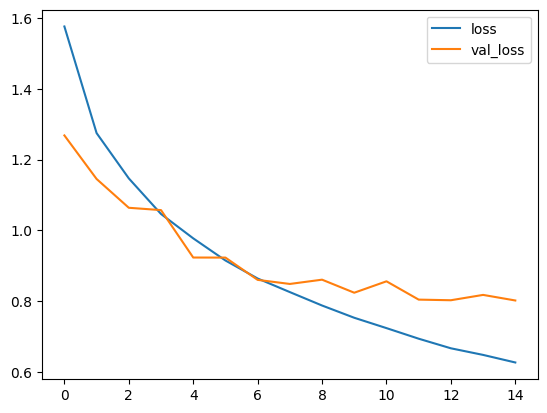

In [7]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Here we can see that, there's some chance we are overfitting. 

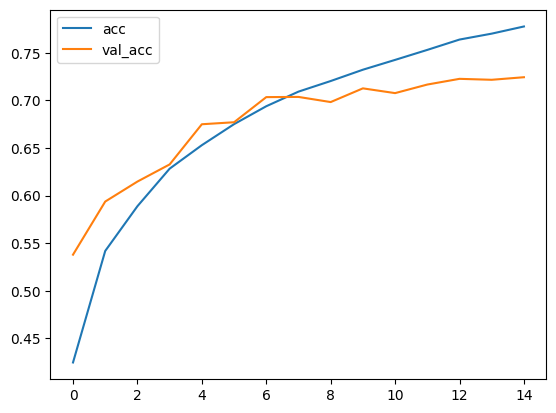

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

So we see that the traning accuracy has not yet converged, while the validation accuracy stays steady. This is an another sign that model could be overfitting, if the training accuracy is getting higher without any imporvement in the validation accuracy than the model is only learning to match the noise in the traning set.

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[732  31  47  16  20   7   6  18  80  43]
 [  6 872   5   7   4   1   8   3  20  74]
 [ 59   7 552  70 117  69  53  45  16  12]
 [ 17  11  42 529  85 187  49  42  15  23]
 [ 18   5  39  67 709  24  38  81  14   5]
 [ 11   5  29 192  57 613  22  53   5  13]
 [  8   7  29  56  49  29 796  10   5  11]
 [ 13   3  22  32  63  57   9 782   3  16]
 [ 37  44  11  16   5   5   5   6 850  21]
 [ 21  91   9   9   2   5   5  22  28 808]]


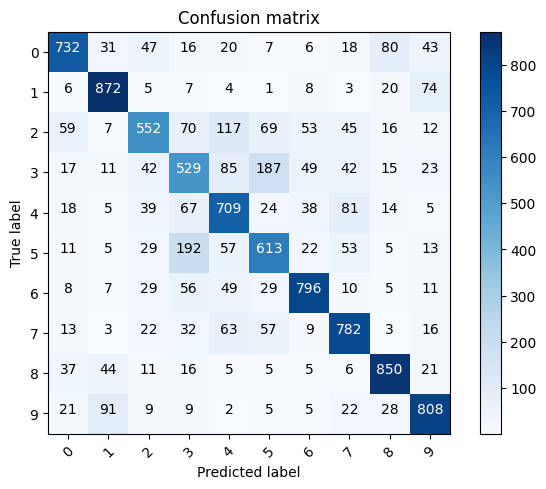

In [9]:
# Plot confusion matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

As we see, there are many misclassifed samples.

In [10]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

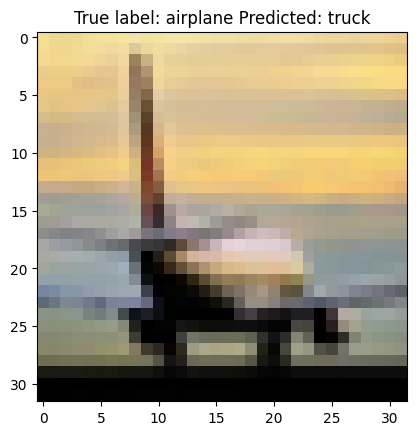

In [13]:
# plot some misclassified examples to make sure atleast they make sense 

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));